In [1]:
import numpy as np
import pandas as pd

In [2]:
df_1 = pd.read_csv('IRIS.csv')
df_3 = pd.read_csv('Airline Paddenger Satisfaction.csv')
df_2 = pd.read_csv('healthcare-dataset-stroke-data.csv')

# DataFrame 1


In [ ]:
# Создание нового DataFrame для бинаризированных данных
df_bin = pd.DataFrame()
df = df_1
# Бинаризация 'sepal_length'
step = 0.5
start, finish = df['sepal_length'].min(), df['sepal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_length({i}, {i+step})'] = df['sepal_length'].between(i, i+step, inclusive='left')

# Бинаризация 'sepal_width'
step = 0.5
start, finish = df['sepal_width'].min(), df['sepal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'sepal_width({i}, {i+step})'] = df['sepal_width'].between(i, i+step, inclusive='left')

# Бинаризация 'petal_length'
step = 0.5
start, finish = df['petal_length'].min(), df['petal_length'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_length({i}, {i+step})'] = df['petal_length'].between(i, i+step, inclusive='left')

# Бинаризация 'petal_width'
step = 0.5
start, finish = df['petal_width'].min(), df['petal_width'].max()
for i in np.arange(start, finish, step):
    df_bin[f'petal_width({i}, {i+step})'] = df['petal_width'].between(i, i+step, inclusive='left')

df_bin['species'] = df['species']

df_bin['sample_id'] = ['iris_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)
df_bin['is_setosa'] = df_bin['species'] == 'Iris-setosa'
df_bin.drop('species', axis=1, inplace=True)

df_bin
df_bin.to_csv('binarized_data_1.csv', index=True)

# DataFrame 2

In [67]:
df = df_2
# Основная информация о датасете
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  age_category       5110 non-null   category
 13  glucose_category   5110 non-null   category
 14  bmi_category       5097 non-null   category
dtypes: category(3), float64(3), int64(4), object(5)
memory 

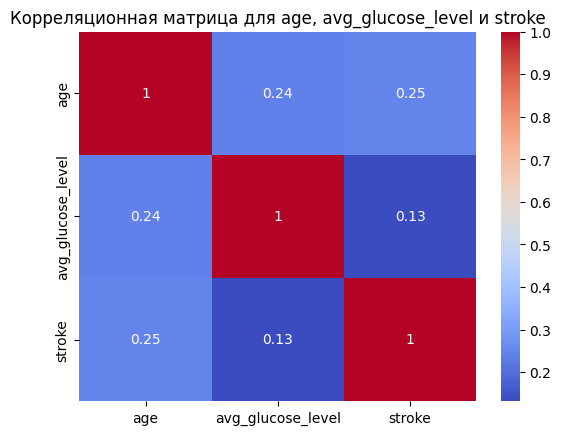

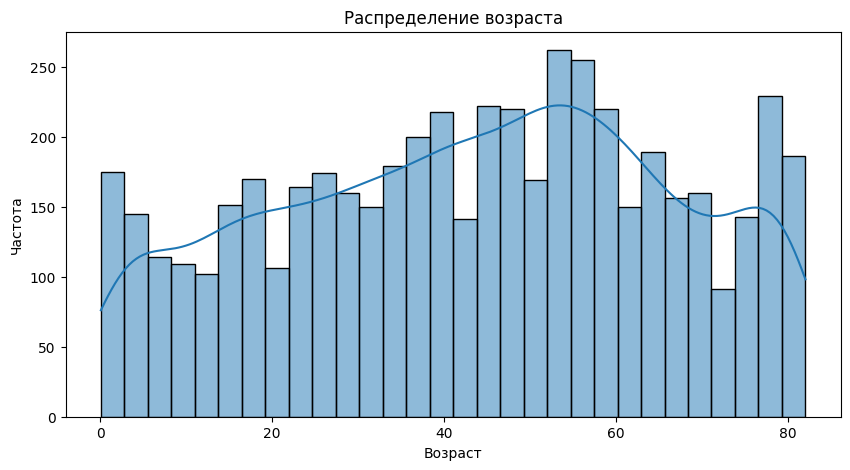

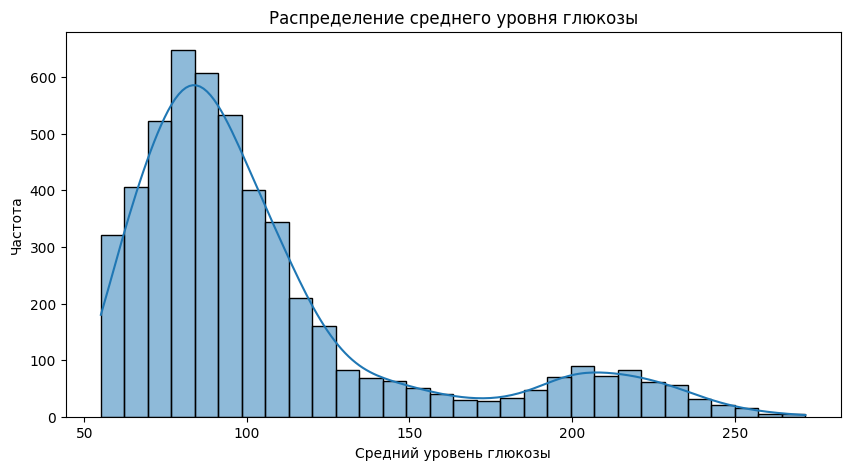

In [68]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
import matplotlib.pyplot as plt
import seaborn as sns

correlation_data = df[['age', 'avg_glucose_level', 'stroke']].corr()

# Визуализация корреляционной матрицы
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для age, avg_glucose_level и stroke')
plt.show()

# Гистограмма для 'age'
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

# Гистограмма для 'avg_glucose_level'
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_glucose_level'], bins=30, kde=True)
plt.title('Распределение среднего уровня глюкозы')
plt.xlabel('Средний уровень глюкозы')
plt.ylabel('Частота')
plt.show()

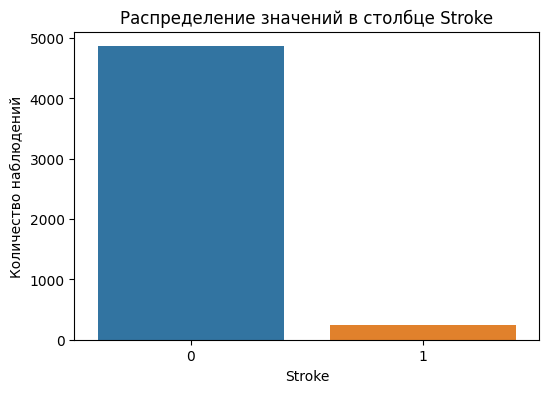

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df)
plt.title('Распределение значений в столбце Stroke')
plt.xlabel('Stroke')
plt.ylabel('Количество наблюдений')
plt.show()

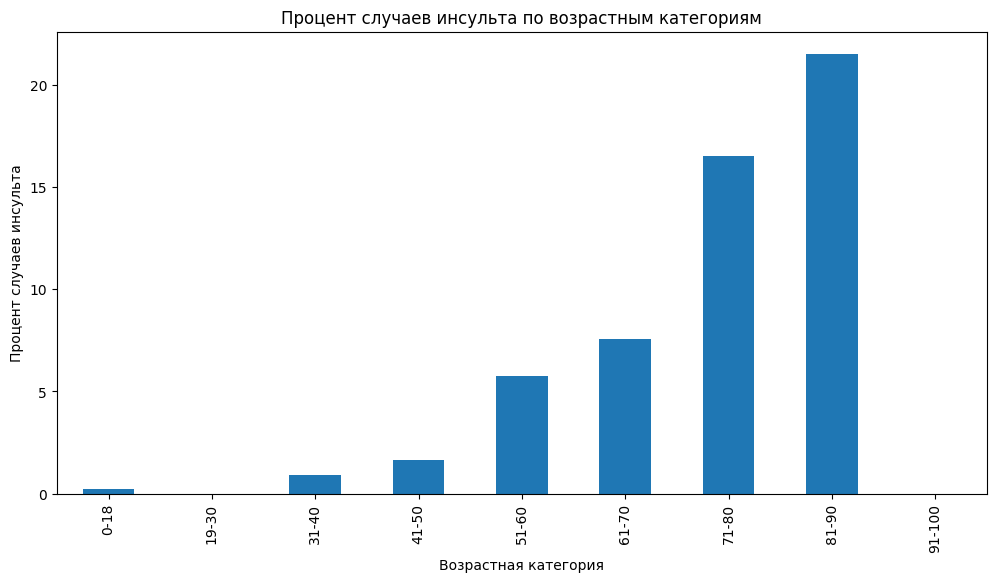

In [58]:
# Определение границ и меток возрастных категорий
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

stroke_percentages = df.groupby('age_category')['stroke'].mean() * 100

stroke_percentages.plot(kind='bar', figsize=(12, 6))
plt.title('Процент случаев инсульта по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Процент случаев инсульта')
plt.show()

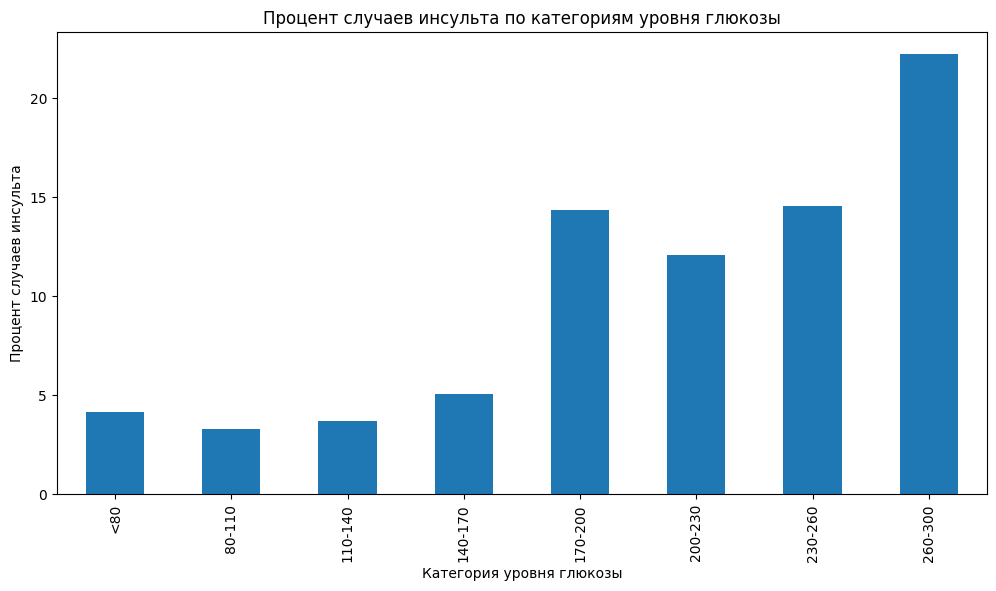

In [59]:
glucose_bins = [0, 80, 110, 140, 170, 200, 230, 260, 300]
glucose_labels = ['<80', '80-110', '110-140', '140-170', '170-200', '200-230', '230-260', '260-300']
df['glucose_category'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)

stroke_percentages_glucose = df.groupby('glucose_category')['stroke'].mean() * 100

# Визуализация
stroke_percentages_glucose.plot(kind='bar', figsize=(12, 6))
plt.title('Процент случаев инсульта по категориям уровня глюкозы')
plt.xlabel('Категория уровня глюкозы')
plt.ylabel('Процент случаев инсульта')
plt.show()

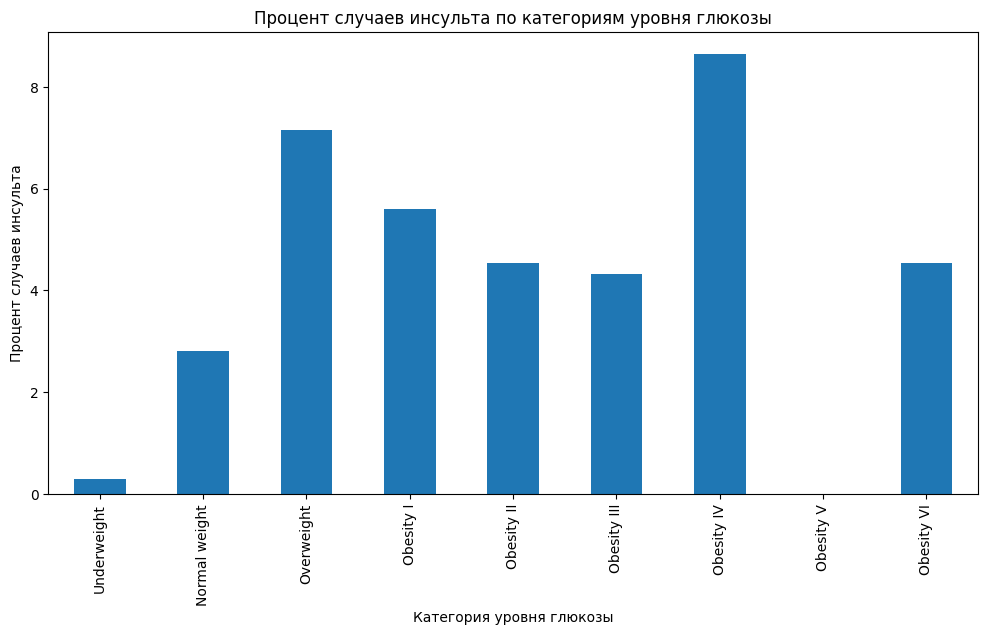

In [60]:
# Бинаризация 'bmi'
bmi_bins = [0, 18.5, 25, 30, 35, 40, 45, 50, 55, 60]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III', 'Obesity IV', 'Obesity V', 'Obesity VI']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
stroke_percentages_glucose = df.groupby('bmi_category')['stroke'].mean() * 100
# Визуализация
stroke_percentages_glucose.plot(kind='bar', figsize=(12, 6))
plt.title('Процент случаев инсульта по категориям уровня глюкозы')
plt.xlabel('Категория уровня глюкозы')
plt.ylabel('Процент случаев инсульта')
plt.show()

In [61]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_category', 'glucose_category',
       'bmi_category'],
      dtype='object')


In [62]:
columns_to_drop = ['age_category', 'glucose_category','bmi_category']
df = df.drop(columns=columns_to_drop)

In [63]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [65]:
df_bin = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Бинаризация 'age'
step = 30
start, finish = df['age'].min(), df['age'].max()
for i in range(int(start), int(finish), step):
    df_bin[f'age({i}-{i+step})'] = df['age'].between(i, i+step, inclusive='left')

# Бинаризация 'avg_glucose_level'
step = 100
start, finish = df['avg_glucose_level'].min(), df['avg_glucose_level'].max()
for i in range(int(start), int(finish), step):
    df_bin[f'avg_glucose_level({i}-{i+step})'] = df['avg_glucose_level'].between(i, i+step, inclusive='left')

# Бинаризация 'bmi'
step = 40
start, finish = df['bmi'].min(), df['bmi'].max()
for i in range(int(start), int(finish), step):
    df_bin[f'bmi({i}-{i+step})'] = df['bmi'].between(i, i+step, inclusive='left')

columns_to_drop = ['age', 'id','bmi', 'avg_glucose_level']
df_bin = df_bin.drop(columns=columns_to_drop)
# Копирование столбца 'stroke' из исходного DataFrame
df_bin['stroke'] = df['stroke']
for column in df_bin.columns:
    if not all(df_bin[column].isin([0, 1])):
        raise ValueError(f"Столбец {column} содержит значения, отличные от 0 и 1")

# Преобразование всех столбцов DataFrame в булев тип
df_bin = df_bin.astype(bool)

# Проверка результатов
print(df_bin.head())
# Создание уникальных идентификаторов для каждого наблюдения
df_bin['sample_id'] = ['person_' + str(i) for i in range(df_bin.shape[0])]

# Установка 'sample_id' в качестве индекса
df_bin.set_index('sample_id', inplace=True)

# Преобразование 'stroke' в булев тип
df_bin['stroke'] = df_bin['stroke'].astype(bool)

# Сохранение обработанных данных в файл
df_bin.to_csv('binarized_data_2.csv', index=True)

# Вывод обработанного DataFrame
print(df_bin)

   hypertension  heart_disease  stroke  gender_Female  gender_Male  \
0         False           True    True          False         True   
1         False          False    True           True        False   
2         False           True    True          False         True   
3         False          False    True           True        False   
4          True          False    True           True        False   

   gender_Other  ever_married_No  ever_married_Yes  work_type_Govt_job  \
0         False            False              True               False   
1         False            False              True               False   
2         False            False              True               False   
3         False            False              True               False   
4         False            False              True               False   

   work_type_Never_worked  ...  smoking_status_smokes  age(0-30)  age(30-60)  \
0                   False  ...                  False 

In [66]:
df_bin

,hypertension,heart_disease,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,smoking_status_smokes,age(0-30),age(30-60),age(60-90),avg_glucose_level(55-155),avg_glucose_level(155-255),avg_glucose_level(255-355),bmi(10-50),bmi(50-90),bmi(90-130)
sample_id,,,,,,,,,,,,,,,,,,,,,
person_0,False,True,True,False,True,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
person_1,False,False,True,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
person_2,False,True,True,False,True,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
person_3,False,False,True,True,False,False,False,True,False,False,...,True,False,True,False,False,True,False,True,False,False
person_4,True,False,True,True,False,False,False,True,False,False,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
person_5105,True,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
person_5106,False,False,False,True,False,False,False,True,False,False,...,False,False,False,True,True,False,False,True,False,False
person_5107,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,True,False,False,True,False,False


# DataFrame 3

In [ ]:
df = df_3

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

<ipython-input-91-8b8724facdc7>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')


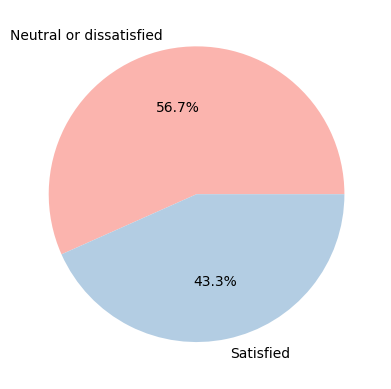

In [ ]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("Pastel1"), autopct = '%1.1f%%')
pass

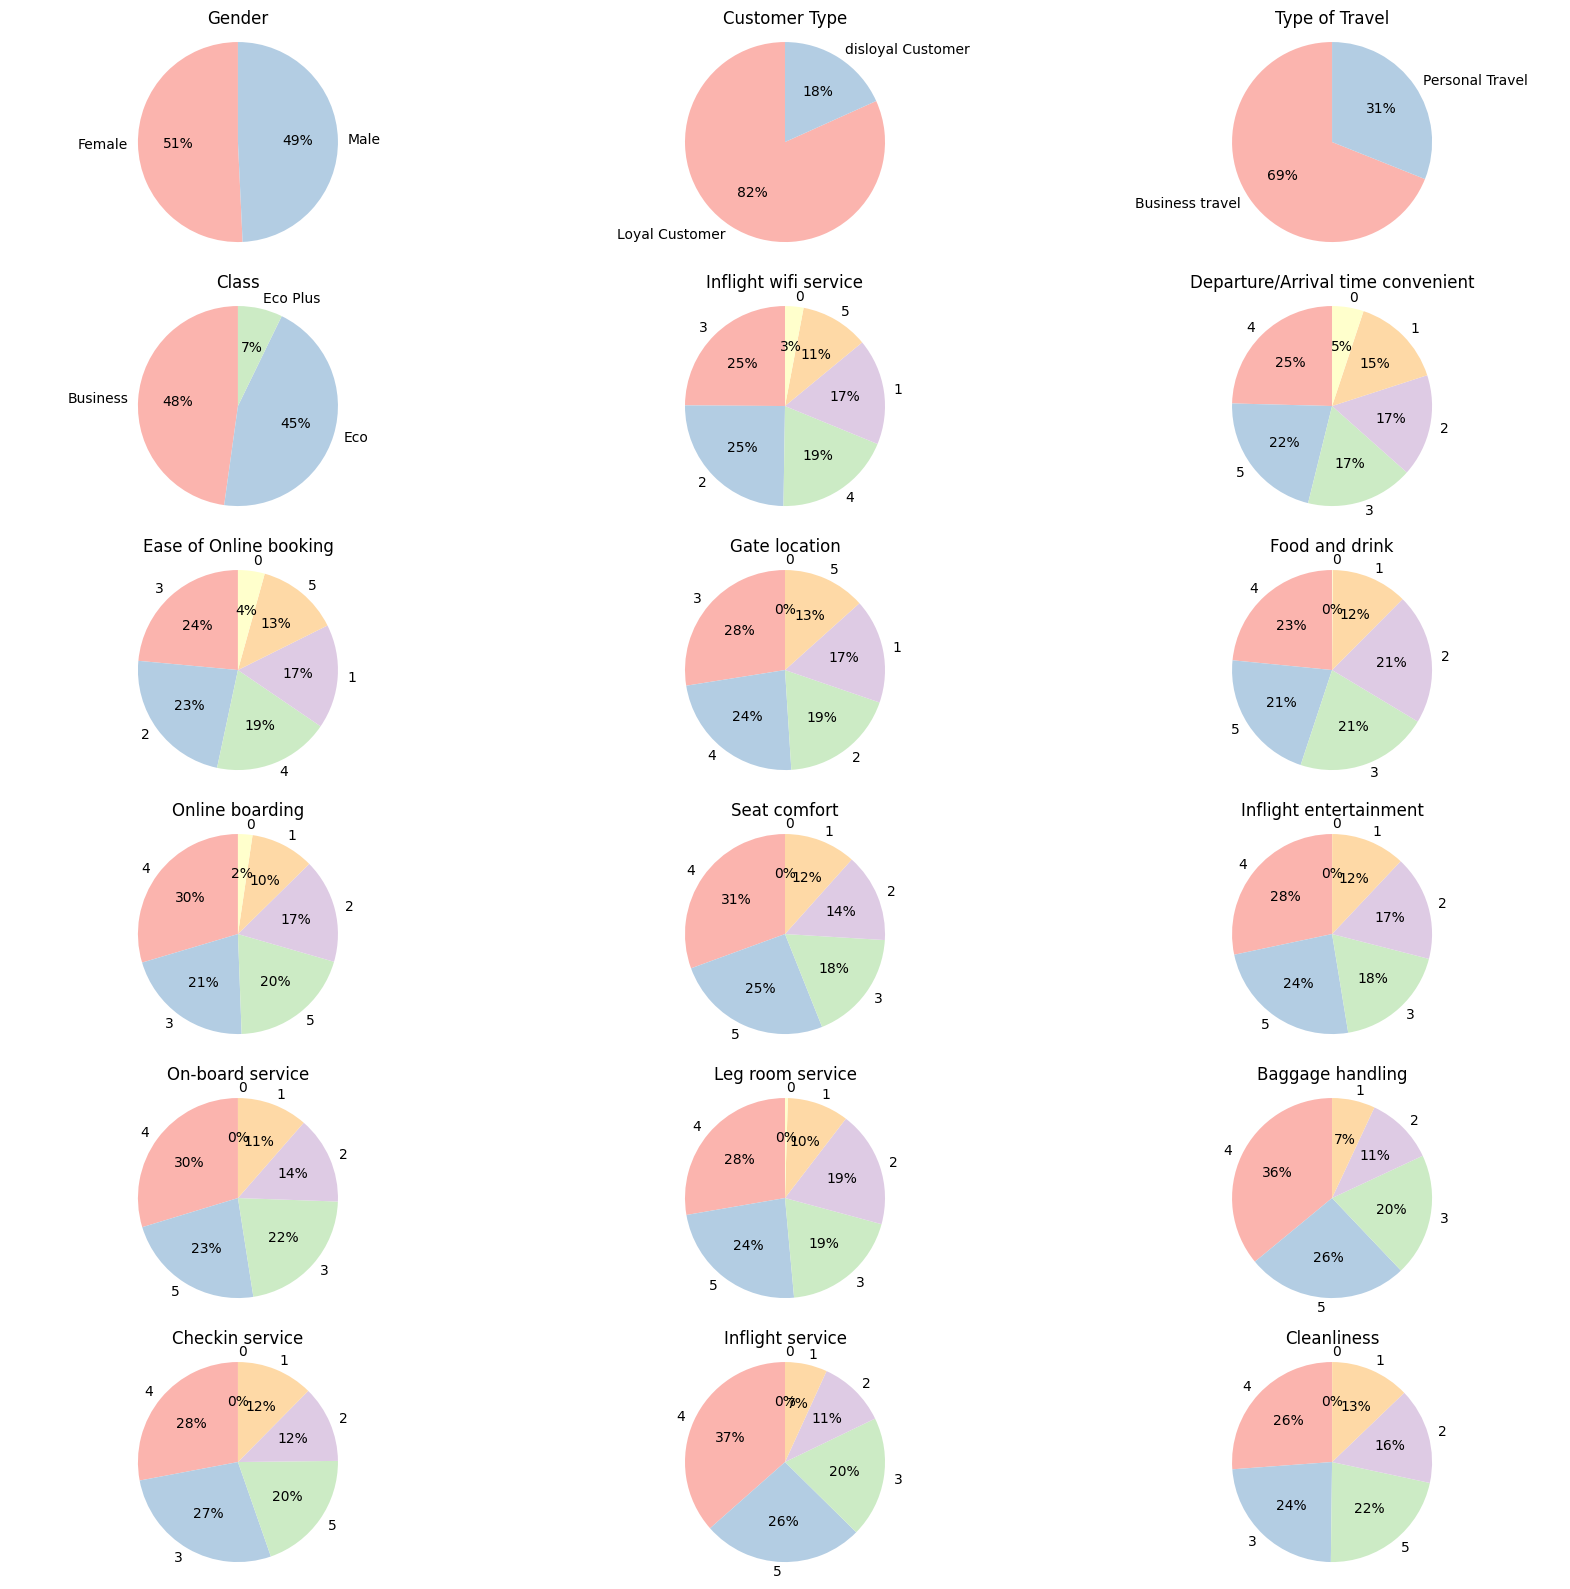

In [ ]:
categ = df.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("Pastel1"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

In [ ]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


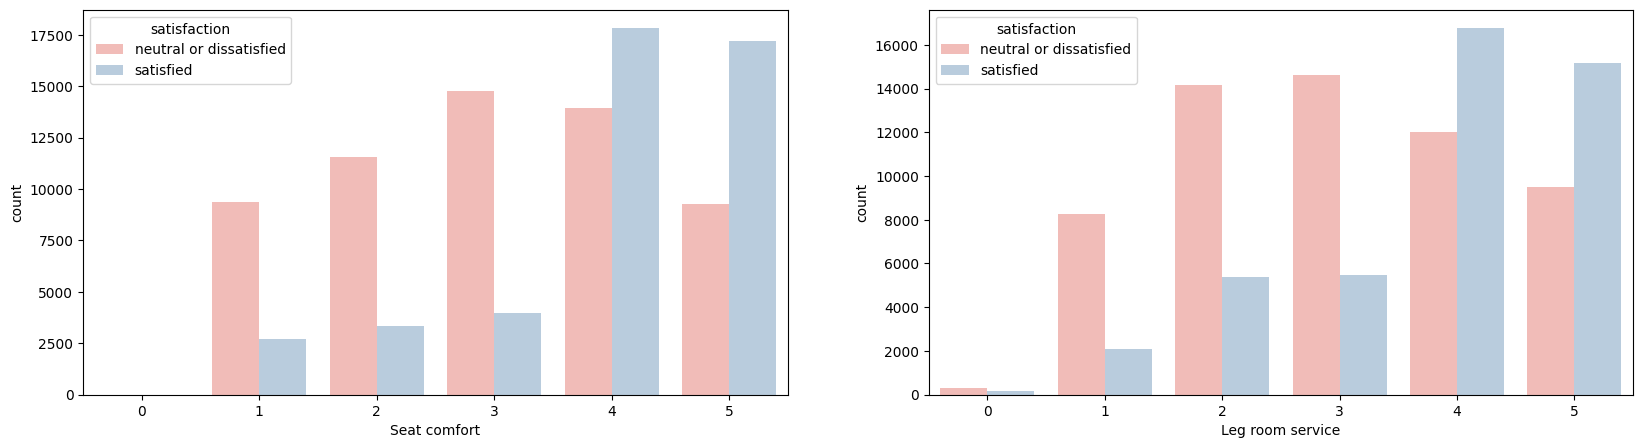

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "Pastel1", data = df,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "Pastel1", data = df, ax = ax[1])
plt.show()

In [ ]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [ ]:
df.sample()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
72922,Male,Loyal Customer,51,Personal Travel,Eco,1024,1,3,1,4,...,1,3,5,3,4,4,1,0,0.0,neutral or dissatisfied


In [ ]:
df_bin = pd.DataFrame()
# Бинаризация атрибутов с оценкой от 1 до 5
rating_columns = [
    'Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

for col in rating_columns:
    df_bin[f'{col}_high'] = df[col].apply(lambda x: True if x >= 4 else False)

# Бинаризация числовых атрибутов 'Age' и 'Flight distance'
age_step = 10
start, finish = df['Age'].min(), df['Age'].max()
for i in range(int(start), int(finish), age_step):
    df_bin[f'Age_{i}_{i+age_step}'] = df['Age'].between(i, i+age_step, inclusive='left')

distance_step = 500
start, finish = df['Flight Distance'].min(), df['Flight Distance'].max()
for i in range(int(start), int(finish), distance_step):
    df_bin[f'Flight Distance_{i}_{i+distance_step}'] = df['Flight Distance'].between(i, i+distance_step, inclusive='left')

# One-Hot Encoding для категориальных атрибутов
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_bin['satisfaction'] = df['satisfaction'].apply(lambda x: True if x == 'satisfied' else False)


df_bin = df_bin.join(pd.get_dummies(df[categorical_columns]))
for col in df_bin.columns:
    if df_bin[col].dtype == 'uint8':
        df_bin[col] = df_bin[col].astype(bool)

# Бинаризация для 'Departure Delay in Minutes' и 'Arrival Delay in Minutes'
df_bin['Departure_Delay_30min'] = df['Departure Delay in Minutes'].apply(lambda x: True if x > 30 else False)
df_bin['Arrival_Delay_30min'] = df['Arrival Delay in Minutes'].apply(lambda x: True if x > 30 else False)
df_bin['sample_id'] = ['Person_' + str(i) for i in range(df_bin.shape[0])]
df_bin.set_index('sample_id', inplace=True)


In [ ]:
df_bin
df_bin = df_bin.drop(df_bin.tail(15000).index)
df_bin.to_csv('binarized_data_3.csv', index=True)

In [ ]:
df_bin.isna().sum()

Inflight wifi service_high                0
Departure/Arrival time convenient_high    0
Ease of Online booking_high               0
Gate location_high                        0
Food and drink_high                       0
Online boarding_high                      0
Seat comfort_high                         0
Inflight entertainment_high               0
On-board service_high                     0
Leg room service_high                     0
Baggage handling_high                     0
Checkin service_high                      0
Inflight service_high                     0
Cleanliness_high                          0
Age_7_17                                  0
Age_17_27                                 0
Age_27_37                                 0
Age_37_47                                 0
Age_47_57                                 0
Age_57_67                                 0
Age_67_77                                 0
Age_77_87                                 0
Flight Distance_31_531          